# Clarans on the IRIS Dataset





<div class="alert alert-block alert-success">
<b>Goals:</b> 

* Demonstrate Clarans. This is a rather technical notebook, focussing on properties and runtime rather than on results.
</div>


<div class="alert alert-block alert-info">
<b>Content:</b> In this notebook, we test and time Clarans using the IRIS dataset.
</div>



In [5]:
import time
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from pyclustering.cluster.clarans import clarans

c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyclustering\utils\__init__.py:264: SyntaxWarning: invalid escape sequence '\s'
  """!
c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyclustering\utils\metric.py:299: SyntaxWarning: invalid escape sequence '\s'
  """!
c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyclustering\utils\metric.py:338: SyntaxWarning: invalid escape sequence '\s'
  """!
c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyclustering\utils\metric.py:377: SyntaxWarning: invalid escape sequence '\s'
  """!
c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyclustering\utils\metric.py:418: SyntaxWarning: invalid escape sequence '\m'
  """!
c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyclustering\utils\metric.py:461: SyntaxWarning: invalid escape sequence '\s'
  """!
c:\Users\TimPr\AppData\Local\Programs\Python\Pytho

# Load IRIS
Again we will use only the petal features. 
This feature selection is just for the purpose of creating a 2D dataset, that can be visualized.
This is not something one would normally do!

In [7]:
iris=pd.read_csv(r"C:\Users\TimPr\all_code\FHCode-1\math\04_Tabular_Data\iris.csv")
X=iris[['petal_length', 'petal_width']].to_numpy()

Run Clarans on the IRIS Dataset, using only features 2 and 3

In [15]:
# Clarans does not offer a parameter for random seed. Internally, random is initialized with system time
cla = clarans(X, number_clusters=3, numlocal=10, maxneighbor=10)

In [16]:
time_start=time.time()
cla.process()
print(time.time()-time_start) # returns the time in seconds

252.94348907470703


In [10]:
cluster_array=cla.get_clusters()
len(cluster_array)

3

Show the distribution of instances over clusters

In [11]:
for i in range(0,len(cluster_array)):
    print("Cluster ", i, " has ", len(cluster_array[i]), " data instances.")

Cluster  0  has  26  data instances.
Cluster  1  has  24  data instances.
Cluster  2  has  100  data instances.


Print the resulting clustering and medoids

In [12]:
cla.get_medoids()

[29, 1, 54]

In [13]:
X[cla.get_medoids(), :]

array([[1.6, 0.2],
       [1.4, 0.2],
       [4.6, 1.5]])

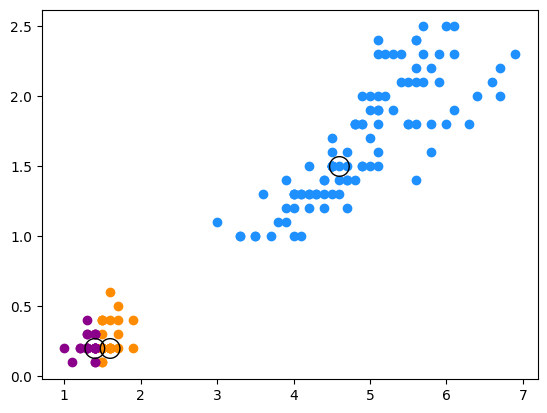

In [14]:
colors=['darkorange', 'darkmagenta', 'dodgerblue']
for i in range(0,len(cluster_array)):
    plt.scatter(X[cluster_array[i], 0], X[cluster_array[i], 1], c=colors[i], label=i)

plt.scatter(X[cla.get_medoids(), 0], X[cla.get_medoids(), 1], s=200,
           linewidth=1, facecolors='none', edgecolors='black')

<div class="alert alert-block alert-info">
<b>Take Aways:</b> 

* In this notebook, we have run Clarans.
* The resulting cluster representatives are indeed members of the dataset -- thus prototypical instances for their clusters.
* Runtime is much higher compared to k-means!
</div>


<div class="alert alert-block alert-success">
<b>Play with:</b> 

* Rerun the notebook or individual cells a couple of times and observe the resulting clusters and medoids.
* Try to understand why they change. For answers look at the [source](https://pyclustering.github.io/docs/0.10.1/html/de/d9f/clarans_8py_source.html) and understand the method [random.seed()](https://docs.python.org/3/library/random.html#random.seed). 
</div>
